# Objective

The purpose is to find the wine quality based on vaious input parameters like fixed acidity, volatile acidity, citric acid, residuals sugars, free sulpher dioxide, total sulpher dioxide, density, pH, sulphates, alcohol, quality

Importing Packages

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

Getting the data

In [8]:
df = pd.read_csv('./../data/winequalityN.csv')

Column names and data types 

In [9]:
df.groupby('quality').count()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,,
3,30,30,30,30,30,30,30,30,30,30,30,30
4,216,216,216,216,216,215,216,216,216,216,215,216
5,2138,2133,2136,2137,2138,2138,2138,2138,2138,2135,2137,2138
6,2836,2832,2832,2834,2835,2835,2836,2836,2836,2832,2834,2836
7,1079,1079,1077,1079,1078,1079,1079,1079,1079,1077,1079,1079
8,193,192,193,193,193,193,193,193,193,193,193,193
9,5,5,5,5,5,5,5,5,5,5,5,5


In [5]:
df.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Head of the dataframe

In [76]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Division of the wine type and quality

In [11]:
df.type.value_counts()

white    4898
red      1599
Name: type, dtype: int64

In [77]:
df.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

# Data Cleaning

Checking for Null values

In [80]:
df.count()

type                    6497
fixed acidity           6487
volatile acidity        6489
citric acid             6494
residual sugar          6495
chlorides               6495
free sulfur dioxide     6497
total sulfur dioxide    6497
density                 6497
pH                      6488
sulphates               6493
alcohol                 6497
quality                 6497
dtype: int64

In [81]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

The columns 'fixed acidity', 'volatile acidity', 'citric sugar', 'residual sugar', 'chlorides', 'pH', 'sulphates' have null values in the rows of 10, 8, 3, 2, 2, 9, 4 respectively

In [82]:
df.shape[0]

6497

In [83]:
df.chlorides[df.chlorides.isnull() == True]

98    NaN
747   NaN
Name: chlorides, dtype: float64

In [84]:
df.chlorides = df['chlorides'].fillna(df['chlorides'].mean())

In [85]:
for i in df.columns:
    if df[i].isnull().sum() > 0:
        print(i)
        df[i] = df[i].fillna(df[i].mean())

fixed acidity
volatile acidity
citric acid
residual sugar
pH
sulphates


In [62]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [86]:
df.count()

type                    6497
fixed acidity           6497
volatile acidity        6497
citric acid             6497
residual sugar          6497
chlorides               6497
free sulfur dioxide     6497
total sulfur dioxide    6497
density                 6497
pH                      6497
sulphates               6497
alcohol                 6497
quality                 6497
dtype: int64

# Data Visualization

In [87]:
corr_mat = df.corr(method='pearson')
corr_mat.shape

(12, 12)

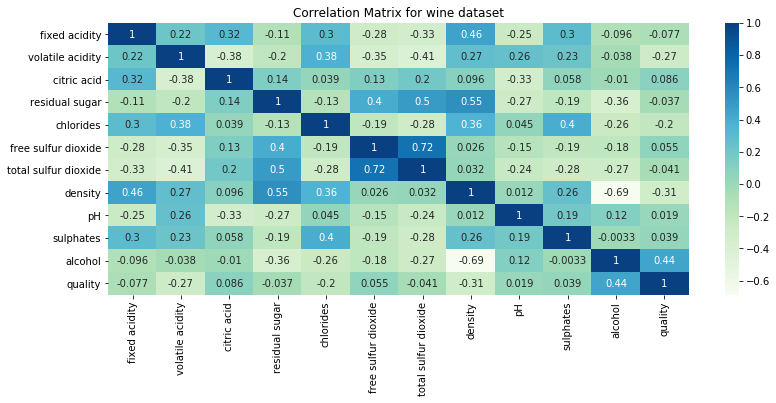

In [88]:
plt.figure(figsize=(13,5))
sb.heatmap(corr_mat, annot=True, cmap='GnBu')
plt.title('Correlation Matrix for wine dataset')
plt.show()

Wine quaity has a higher correlation with alcohol (0.44). The correlation with density, volatile acidity, chlorides is -0.31, -0.27, -0.2 respectively 

# Binning the wine quality into groups

The quality score of 1 to 10 of wine need to be grouped to 3 bins for the below ranges

quality group 0 : 1-4

quality group 1 : 4-7

quality group 2 : 7-10

In [89]:
bins = [1,4,7,11]
labels = [0, 1, 2]

In [124]:
df['quality_group'] = pd.cut(df.quality, bins = bins, labels = labels)

In [138]:
#df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_group
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,6,1
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,6,1
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,6,1
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6,1
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,5,1
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2,6,1
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,6,1
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,5,1


In [139]:
df.groupby('quality_group').count()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
quality_group,,,,,,,,,,,,,
0,246,246,246,246,246,246,246,246,246,246,246,246,246
1,6053,6053,6053,6053,6053,6053,6053,6053,6053,6053,6053,6053,6053
2,198,198,198,198,198,198,198,198,198,198,198,198,198


In [219]:
X = df.iloc[:, 1:12]
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9
...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2


In [220]:
Y = df['quality_group']
Y

0       1
1       1
2       1
3       1
4       1
       ..
6492    1
6493    1
6494    1
6495    1
6496    1
Name: quality_group, Length: 6497, dtype: category
Categories (3, int64): [0 < 1 < 2]

# Adjusting the Train and Test data

In [221]:
from sklearn.model_selection import train_test_split

In [222]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [223]:
Y_train.shape

(4547,)

In [224]:
Y_test.shape

(1950,)

In [225]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression(solver = 'lbfgs', multi_class = 'multinomial', random_state = 150, max_iter=10000, dual=False)

In [226]:
import time
start_time = time.time()

In [227]:
logReg.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=150, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [228]:
end_time = time.time()
print('Time taken for model is - ', end_time-start_time)

Time taken for model is -  14.376572132110596


In [229]:
Y_pred = logReg.predict(X_test)

In [230]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_pred, Y_test))

0.9343589743589743


# PCA for input X

In [231]:
X = df.iloc[:, 1:12]
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [242]:
Y = df['quality_group']
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: quality_group, dtype: category
Categories (3, int64): [0 < 1 < 2]

Normalization

In [243]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [244]:
X = StandardScaler().fit_transform(df.iloc[:,1:12])

In [245]:
pca = PCA(n_components=7)
X = pca.fit_transform(X)

In [252]:
X.shape

(6497, 7)

In [247]:
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.27542041 0.22670389 0.14132792 0.08830461 0.06546648 0.05517059
 0.04759601]
0.8999899125188311


In [248]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [249]:
logReg.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=150, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [250]:
Y_pred = logReg.predict(X_test)

In [251]:
print(accuracy_score(Y_test, Y_pred))

0.9176923076923077


# K Means

In [266]:
X = df.iloc[:, 1:12].values
X

array([[ 7.   ,  0.27 ,  0.36 , ...,  3.   ,  0.45 ,  8.8  ],
       [ 6.3  ,  0.3  ,  0.34 , ...,  3.3  ,  0.49 ,  9.5  ],
       [ 8.1  ,  0.28 ,  0.4  , ...,  3.26 ,  0.44 , 10.1  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [267]:
from sklearn.cluster import KMeans

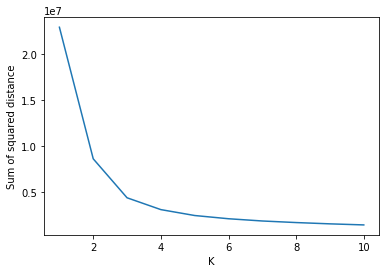

In [268]:
ssd = []
for k in range(1,11):
    km = KMeans(n_clusters=k, init = 'k-means++')
    km.fit(X)
    ssd.append(km.inertia_)
plt.xlabel('K')
plt.ylabel('Sum of squared distance')
plt.plot(range(1,11), ssd)

According to the elbow technique the optimum value of k is 3

In [283]:
kmeans = KMeans(n_clusters = 3)
quality_group = kmeans.fit_predict(X)

In [284]:
quality_group

array([0, 1, 1, ..., 2, 2, 2])

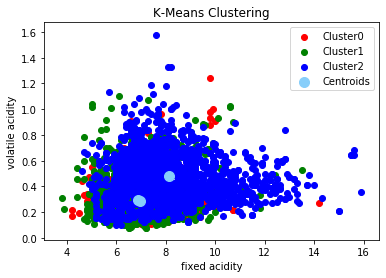

In [285]:
#2D PLot
colors = 'rgbkcmy'
for i in np.unique(quality_group):
    plt.scatter(X[quality_group==i, 0], X[quality_group == i, 1], color=colors[i], label='Cluster' + str(i))
plt.scatter(kmeans.cluster_centers_[:,0],
           kmeans.cluster_centers_[:,1], s=100,
           c = 'lightskyblue', label='Centroids')
plt.legend()
plt.title('K-Means Clustering')
plt.xlabel(df.columns[1])
plt.ylabel(df.columns[2])
plt.show()

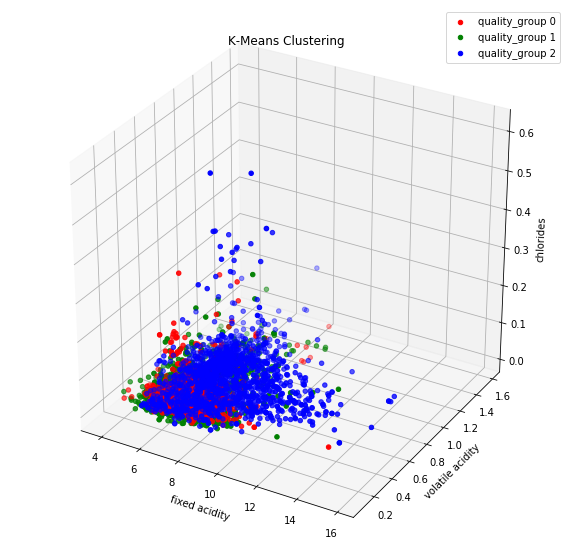

In [287]:
from mpl_toolkits.mplot3d import Axes3D
#3D plot
fig = plt.figure(figsize=(10,10))
ax=plt.axes(projection='3d')
for i in np.unique(quality_group):
    ax.scatter3D(X[quality_group==i, 0],
                X[quality_group==i, 1],
                X[quality_group==i, 4],
                color=colors[i], 
                label = 'quality_group '+str(i))
ax.set_xlabel(df.columns[1])
ax.set_ylabel(df.columns[2])
ax.set_zlabel(df.columns[5])

plt.legend()
plt.title('K-Means Clustering')
plt.show()

# DBSCAN

In [290]:
X = df.iloc[:,1:12]
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [6]:
from sklearn.cluster import DBSCAN

In [1]:
dbscan = DBSCAN(eps = 3, min_samples = 50)

NameError: name 'DBSCAN' is not defined

In [2]:
quality_groups = dbscan.fit_predict(X)

NameError: name 'dbscan' is not defined

In [314]:
print(quality_groups.max())

3


In [316]:
colors = 'rgbkcmy'
for i in np.unique(quality_groups):
    label = 'Outliner' if i == -1 else 'quality_groups' + str(i)
    plt.scatter(X[quality_groups == i, 0], X[quality_groups == i, 1], color=colors[i], label = label)

plt.legend()
plt.show()

TypeError: '(array([ True,  True,  True, ...,  True,  True,  True]), 0)' is an invalid key